In this notebook we demonstrate how pretraining models in an unsupervised manner can improve the label efficiency of a downstream task, in this case the EuroSAT classification task.

In [2]:
experiments = [
    'scratch',
    'imagenet-ft',
    'imagenet-tl',
    'ssl-ft',
    'ssl-tl'
]

label_ratios = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]

logs_dir = 'logs'

In [3]:
import pandas as pd
import os

data = {}
for name in experiments:
    data[name] = {}
    for label_ratio in label_ratios:
        try:
            dir = f"{logs_dir}/{name}-{label_ratio}"
            versions = sorted(os.listdir(dir))
            latest_version = versions[-1]
            metrics = pd.read_csv(f"{dir}/{latest_version}/metrics.csv")
            last_val_acc = metrics.iloc[-1]['val_acc']
        except Exception as e:
            print(f"Error reading metrics for {name}-{label_ratio}: {e}")
            last_val_acc = 0.0
        data[name][label_ratio] = last_val_acc

# Create DataFrame with proper index
benchmark = pd.DataFrame(data)

benchmark

,scratch,imagenet-ft,imagenet-tl,ssl-ft,ssl-tl
0.01,0.332593,0.722963,0.675000,0.650370,0.563148
0.02,0.650926,0.820185,0.726296,0.738519,0.640185
0.05,0.658148,0.842593,0.785185,0.821296,0.687778
0.10,0.780370,0.926667,0.826296,0.828333,0.725741
0.20,0.843333,0.926296,0.856111,0.756481,0.769630
0.50,0.866111,0.951296,0.876667,0.863148,0.807037
1.00,0.850741,0.946296,0.890000,0.844630,0.825556


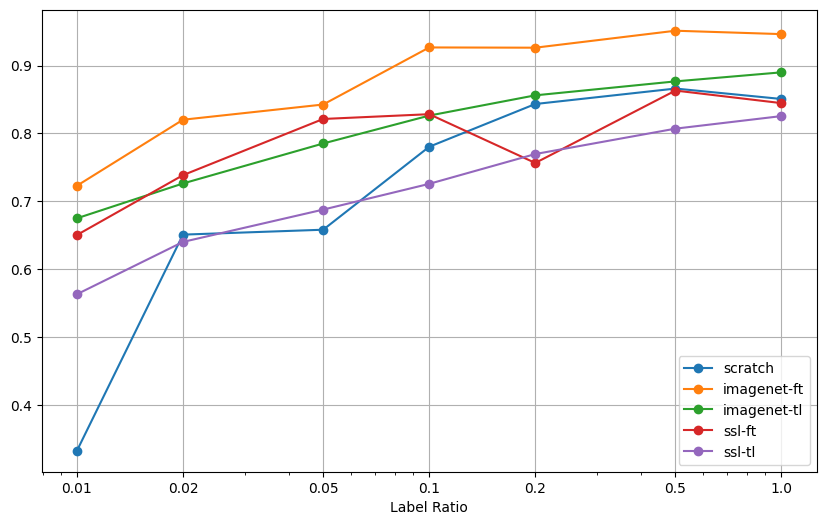

In [4]:
import matplotlib.pyplot as plt

benchmark.plot(kind='line', figsize=(10, 6), marker='o', grid=True)
plt.xscale('log')
plt.xlabel('Label Ratio')
plt.xticks(label_ratios, label_ratios)  
plt.show()
